## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Read in raw csv files with Pandas
mouse_metadata=pd.read_csv(r"C:\Users\akibo\Desktop\Columbia Bootcamp\Matplotlib-Storytelling\Resources\Mouse_metadata.csv")
study_results=pd.read_csv(r"C:\Users\akibo\Desktop\Columbia Bootcamp\Matplotlib-Storytelling\Resources\Study_results.csv")

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results,on="Mouse ID",how='outer',)
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the DataFrame.
mice_count=combined_data['Mouse ID'].nunique()
mice_count

249

In [6]:
# Clean DataFrame by dropping any rows that have the same Mouse ID and Timepoint.
combined_data_cleaned=combined_data.drop_duplicates(['Mouse ID','Timepoint'])
combined_data_cleaned.loc[combined_data_cleaned['Drug Regimen']=='Capomulin']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


## Summary Statistics

In [23]:
# Summary statistics table for tumor volume of each regimen generated by passing in columns

# Start by setting up a table (summary_stats) as an empty dataframe
summary_stats=pd.DataFrame()

# Add in the needed columns by passing them in as rows
summary_stats['Mean T.V']=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_stats['Median T.V']=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_stats['Variance T.V']=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_stats['Std Deviation T.V']=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_stats['SEM T.V']=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Print DataFrame
summary_stats


,Mean T.V,Median T.V,Variance T.V,Std Deviation T.V,SEM T.V
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(13.549166666666672, 0.5, 'Count')

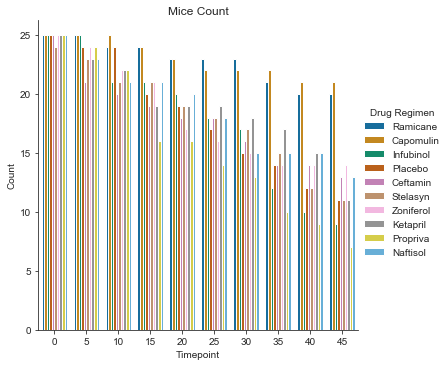

In [28]:
# Graph of the amount of mice for each timepoint based on drug regimen

# We can get a grouped bar chart by using seaborn
# I use the colorblind palette here to accomodate the disabled as well as to differentiate drugs
sns.catplot(x="Timepoint",kind="count",hue="Drug Regimen",data=combined_data_cleaned, palette='colorblind')

# Add in a title and label for the y axis
plt.title("Mice Count")
plt.ylabel("Count")

## Pie Plots

Text(0.5, 1.0, 'Gender Count')

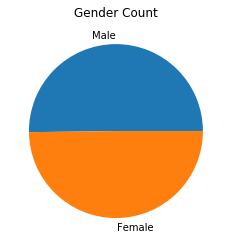

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# combined_data.groupby('Mouse ID').nunique()
Gender_lables= ["Male","Female"]


Gender_counts_table=combined_data_cleaned.drop_duplicates('Mouse ID')['Sex'].value_counts()
Gender_counts_table.plot(kind='pie')
plt.ylabel("")
plt.title("Gender Count")

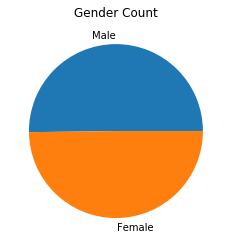

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Gender_counts_table.values,labels=Gender_counts_table.index.values)
plt.title("Gender Count")
plt.show()

## Quartiles, Outliers and Boxplots

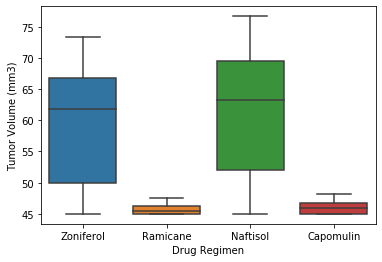

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
combined_data_drugs=combined_data_cleaned.groupby('Mouse ID').max()
combined_data_drugs_top=combined_data_drugs.loc[combined_data_drugs['Drug Regimen'].isin(['Ramicane','Capomulin','Zoniferol','Naftisol'])]

sns.boxplot(x=combined_data_drugs_top['Drug Regimen'],y=combined_data_drugs_top['Tumor Volume (mm3)'],)

# q75,q25=np.percentile()

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

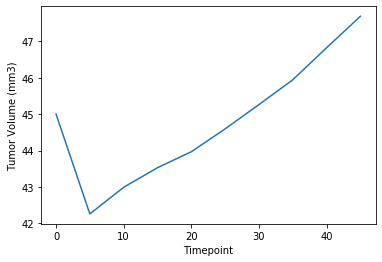

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
i557_mouse=combined_data_cleaned.loc[combined_data_cleaned['Mouse ID']=='i557']
sns.lineplot(i557_mouse['Timepoint'],i557_mouse['Tumor Volume (mm3)'])


In [15]:
# Scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
combined_data_mice=combined_data_cleaned.groupby('Mouse ID').mean()
combined_data_mice

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
a203,20.0,23.0,22.5,56.312708,1.100000
a251,21.0,25.0,22.5,55.237095,0.800000
a262,17.0,29.0,22.5,58.611631,2.300000
a275,20.0,28.0,22.5,52.770965,1.200000
a366,16.0,29.0,15.0,54.639906,0.142857
...,...,...,...,...,...
z435,12.0,26.0,5.0,46.942214,0.000000
z578,11.0,16.0,22.5,38.411510,0.000000
z581,24.0,25.0,22.5,53.979584,2.000000


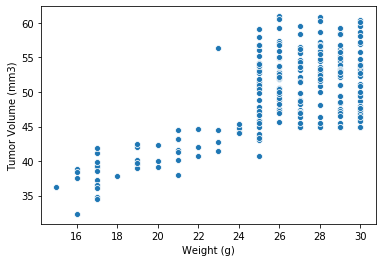

In [16]:
# Created a scatter plot from the new dataframe to measure the effects of tumor volume on weight
scatter=sns.scatterplot(combined_data_mice['Weight (g)'],combined_data_mice["Tumor Volume (mm3)"])

## Correlation and Regression

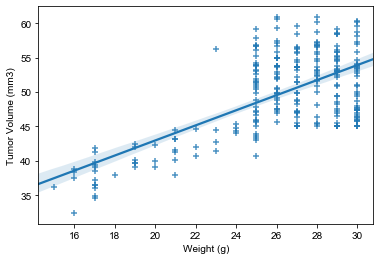

In [17]:
# Graphically describe the relationship between mouse weight and tumor volume 
# Set up values for the x and y in the regression as not to have to repeat indexing them
regression_x=combined_data_mice['Weight (g)']
regression_y=combined_data_mice["Tumor Volume (mm3)"]
# Used seaborn to create a graph of the regression
scatter=sns.regplot(combined_data_mice['Weight (g)'],combined_data_mice["Tumor Volume (mm3)"],marker='+')
sns.set_style('ticks')

In [18]:
# Get the correlation coefficient for the linear regression model, using SciPy
from scipy.stats import spearmanr
spearmanr(regression_x,regression_y)

SpearmanrResult(correlation=0.44359269558899334, pvalue=1.9895161483374914e-13)